# PCA with Logistic Regression

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.


The MNIST database of handwritten digits is available on the following website: MNIST Dataset

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

## Download and Load the Data¶

Download the data from the link:

https://github.com/amplab/datascience-sp14/blob/master/lab7/mldata/mnist-original.mat

In [3]:
import scipy.io
mnist = scipy.io.loadmat('mnist-original.mat')

FileNotFoundError: ignored

In [ ]:
# These are the images
mnist['data'].shape

In [ ]:
mnist_data = np.transpose(mnist['data'])
mnist_data

In [ ]:
# These are the labels
mnist_label = np.transpose(mnist['label'])
mnist_label

In [ ]:
print(mnist_data.shape,' ',mnist_label.shape)

In [ ]:
mnist_data[0] # 0 is white, 255 is pure black. Image is grey scale

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

[0.]


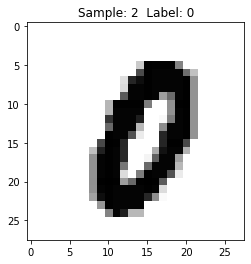

In [ ]:
def display_sample(num):
    #Print the one-hot array of this sample's label 
    # print(mnist_label[num])  <- not needed
    #Print the label converted back to a number
    label = mnist_label[num][0]
    #Reshape the 784 values to a 28x28 image
    image = mnist_data[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(2)

## Splitting Data into Training and Test Sets

In [ ]:
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist_data, mnist_label, test_size=(1/7.0), random_state=0)

In [ ]:
print(train_img.shape)
print(train_lbl.shape)
print(test_img.shape)
print(test_lbl.shape)

(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


## Standardizing the Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_img)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## PCA to Speed up Classification Algorithms (Logistic Regression)

#### Step 0: Import and use PCA. After PCA you can apply a learning algorithm of your choice to the transformed data

In [ ]:
from sklearn.decomposition import PCA

# Make an instance of the Model

pca = PCA(.95)

Fit PCA on training set. Note: you are fitting PCA on the training set only


In [ ]:
pca.fit(train_img)


PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.n_components_

330

Apply the mapping (transform) to both the training set and the test set.

In [ ]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

#### Step 1: Import the model you want to use

In [ ]:
from sklearn.linear_model import LogisticRegression
# parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
# solver = 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

#### Step 3: Training the model on the data, storing the information learned from the data

In [ ]:
logisticRegr.fit(train_img, train_lbl)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
test_img[0]

array([ -7.19629663e+00,  -2.47009935e+00,   3.78176536e+00,
         1.15564634e+00,   6.04803105e+00,   6.33886886e-01,
         2.20555116e+00,  -3.44946247e+00,   1.53824059e+00,
        -2.31504359e+00,  -2.05854994e+00,   2.09543799e+00,
         1.05084455e-01,  -3.90567115e+00,  -1.56880567e+00,
         1.08064936e+00,  -4.15254795e-01,   1.32854801e+00,
        -6.47158784e-01,  -4.48541530e-01,  -1.95222216e+00,
        -6.41021778e-01,   1.07359302e+00,  -7.83768345e-01,
        -5.60844952e-01,   1.11019197e+00,  -1.75083103e+00,
         6.60730898e-01,   1.15653856e+00,   4.54276513e-01,
         4.97826840e-01,  -3.70694521e-01,  -9.73318134e-01,
        -1.80974515e+00,   1.76989339e-01,   8.97012813e-01,
        -8.76820063e-01,  -4.69191712e-01,  -5.97901589e-01,
        -1.23109405e-01,  -7.13657046e-01,   5.30181011e-01,
        -1.73105380e-01,   2.51795402e-01,  -3.22432709e-01,
         2.04992082e-01,   4.09875301e-02,   1.25655790e-01,
        -5.55903756e-02,

In [ ]:
test_img[0].reshape(1,-1)

array([[ -7.19629663e+00,  -2.47009935e+00,   3.78176536e+00,
          1.15564634e+00,   6.04803105e+00,   6.33886886e-01,
          2.20555116e+00,  -3.44946247e+00,   1.53824059e+00,
         -2.31504359e+00,  -2.05854994e+00,   2.09543799e+00,
          1.05084455e-01,  -3.90567115e+00,  -1.56880567e+00,
          1.08064936e+00,  -4.15254795e-01,   1.32854801e+00,
         -6.47158784e-01,  -4.48541530e-01,  -1.95222216e+00,
         -6.41021778e-01,   1.07359302e+00,  -7.83768345e-01,
         -5.60844952e-01,   1.11019197e+00,  -1.75083103e+00,
          6.60730898e-01,   1.15653856e+00,   4.54276513e-01,
          4.97826840e-01,  -3.70694521e-01,  -9.73318134e-01,
         -1.80974515e+00,   1.76989339e-01,   8.97012813e-01,
         -8.76820063e-01,  -4.69191712e-01,  -5.97901589e-01,
         -1.23109405e-01,  -7.13657046e-01,   5.30181011e-01,
         -1.73105380e-01,   2.51795402e-01,  -3.22432709e-01,
          2.04992082e-01,   4.09875301e-02,   1.25655790e-01,
        

In [ ]:
test_img[0].reshape(1,-1).shape

(1, 330)

In [ ]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array([ 1.])

In [ ]:
test_lbl

array([[ 1.],
       [ 9.],
       [ 2.],
       ..., 
       [ 6.],
       [ 3.],
       [ 6.]])

In [ ]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(test_img)

array([ 1.,  9.,  2., ...,  6.,  3.,  6.])

## Measuring Model Performance

In [ ]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9201
